In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [3]:
from google.colab import files
uploaded = files.upload()

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
matdat = loadmat('/content/gdrive/MyDrive/Colab Notebooks/MasterPython/Projects/stateSpaceTrajectories/ALMdata.mat')

Nopr = matdat['PSTH_nonprefer_cue_aligned']
Pref = matdat['PSTH_prefer_cue_aligned']
t = matdat['t'][0]
chanidx = matdat['Channel_all']

chanidx = chanidx.flatten()

Text(0.5, 1.0, 'Preferred')

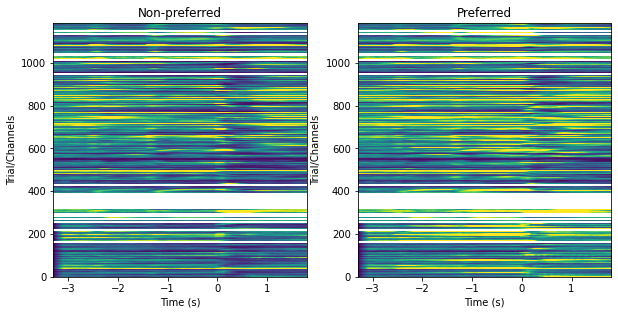

In [6]:
fig, ax = plt.subplots(1,2, figsize=(10,6))

ax[0].imshow(Nopr, extent=[t[0],t[-1],0,Nopr.shape[0]],
             vmin = 0, vmax = 10,origin = 'top')
ax[0].set_aspect(1/ax[0].get_data_ratio())
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Trial/Channels')
ax[0].set_title('Non-preferred')

ax[1].imshow(Pref, extent=[t[0],t[-1],0,Pref.shape[0]],
             vmin = 0,vmax = 10,origin = 'top')
ax[1].set_aspect(1/ax[1].get_data_ratio())
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Trial/Channels')
ax[1].set_title('Preferred')

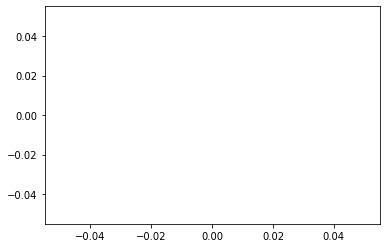

In [7]:
plt.plot(t,np.mean(Nopr,axis = 0),label = 'Nonpref')
plt.plot(t,np.mean(Pref,axis = 0),label = 'Pref')

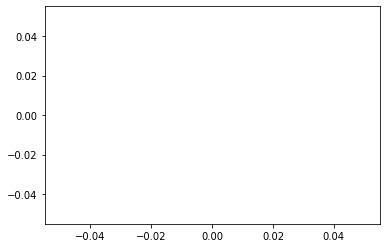

In [8]:
plt.plot(t,Nopr[380,:])
plt.show()



In [9]:
# Remove nans
Nopr = Nopr[np.isfinite(Nopr[:,0]),:]
chanidx = chanidx[np.isfinite(Pref[:,0])]
Pref = Pref[np.isfinite(Pref[:,0]),:]



In [10]:
# Compute new data matrices

nchans = np.max(chanidx)

chanaveNopr = np.zeros((nchans,len(t)))
chanavePref = np.zeros((nchans,len(t)))

for i in range(1,nchans+1):
  chanaveNopr[i-1,:] = np.mean(Nopr[chanidx==i,:],axis = 0)
  chanavePref[i-1,:] = np.mean(Pref[chanidx==i,:],axis = 0)

Text(0.5, 1.0, 'Preferred')

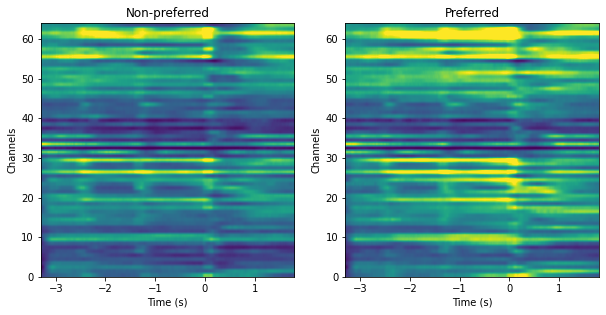

In [11]:
fig, ax = plt.subplots(1,2, figsize=(10,6))

ax[0].imshow(chanaveNopr, extent=[t[0],t[-1],0,nchans],
             vmin = 0, vmax = 10,origin = 'top')
ax[0].set_aspect(1/ax[0].get_data_ratio())
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Channels')
ax[0].set_title('Non-preferred')

ax[1].imshow(chanavePref, extent=[t[0],t[-1],0,nchans],
             vmin = 0,vmax = 10,origin = 'top')
ax[1].set_aspect(1/ax[1].get_data_ratio())
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Channels')
ax[1].set_title('Preferred')

Text(0, 0.5, 'Channels')

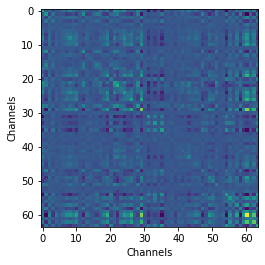

In [12]:
# Compute covariance matrices

covmatPref = np.cov(chanavePref)
covmatNopr = np.cov(chanaveNopr)

covmat = (covmatNopr + covmatPref)/2

plt.imshow(covmat)
plt.xlabel('Channels')
plt.ylabel('Channels')

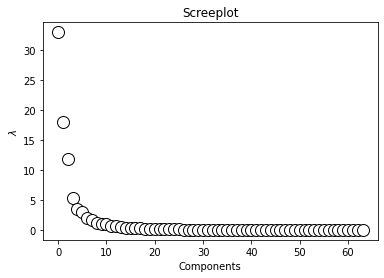

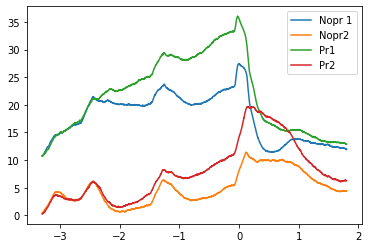

In [30]:
# Eigendecomposition

evals, evecs = np.linalg.eigh(covmat)

sidx = np.argsort(evals)[::-1]
evals = evals[sidx]
evecs = evecs[:,sidx]

plt.plot(evals,'ko', markerfacecolor = 'w',markersize = 12)
plt.xlabel('Components')
plt.ylabel('$\lambda$')
plt.title('Screeplot')
plt.show()
# Compute PC time series

for i in range(2):
  maxi = np.argmax(abs(evecs[:,i]))
  evecs[:,i] *= np.sign(evecs[maxi,i])

pcNopr = evecs[:,0:2].T @ chanaveNopr
pcPref = evecs[:,0:2].T @ chanavePref

plt.plot(t, pcNopr.T, t , pcPref.T)
plt.legend(['Nopr 1','Nopr2', 'Pr1', 'Pr2'])

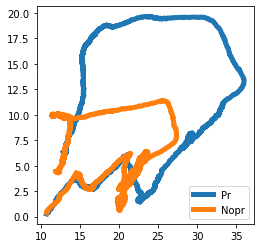

In [35]:
plt.plot(pcPref[0,:],pcPref[1,:],linewidth = 5)
plt.plot(pcNopr[0,:],pcNopr[1,:],linewidth = 5)
plt.gca().set_aspect(1/plt.gca().get_data_ratio())
plt.legend(['Pr','Nopr'])

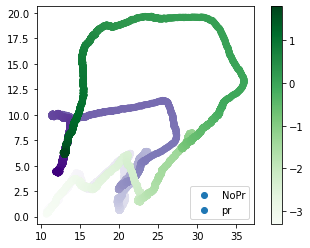

In [38]:
plt.scatter(pcNopr[0,:],pcNopr[1,:],cmap = 'Purples', c = t)
plt.scatter(pcPref[0,:],pcPref[1,:],cmap = 'Greens', c = t)
plt.gca().set_aspect(1/plt.gca().get_data_ratio())
plt.colorbar()
plt.legend(['NoPr','pr'])